<a href="https://colab.research.google.com/github/eunzzae/PJT_C.lab/blob/main/240130_glove(1)_%EC%99%84%EC%84%B1_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

* <참고>
https://jxnjxn.tistory.com/49#6._%ED%99%9C%EC%9A%A9_:_%EC%9B%8C%EB%93%9C_%EC%9E%84%EB%B2%A0%EB%94%A9%EB%90%9C_%EB%B2%A1%ED%84%B0%EB%A1%9C_%EB%AC%B8%EC%9E%A5_%EB%8B%A8%EC%9C%84_%EC%9E%84%EB%B2%A0%EB%94%A9

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# import 라이브러리

In [ ]:
# colab 환경에 glove 설치
! pip install glove-python3

In [ ]:
pip list | grep glove

glove-python3                    0.1.0


In [ ]:
from glove import Corpus, Glove

/usr/local/lib/python3.10/dist-packages/numpy/core/getlimits.py:500: UserWarning: The value of the smallest subnormal for <class 'numpy.float64'> type is zero.
  setattr(self, word, getattr(machar, word).flat[0])
/usr/local/lib/python3.10/dist-packages/numpy/core/getlimits.py:89: UserWarning: The value of the smallest subnormal for <class 'numpy.float64'> type is zero.
  return self._float_to_str(self.smallest_subnormal)
/usr/local/lib/python3.10/dist-packages/numpy/core/getlimits.py:500: UserWarning: The value of the smallest subnormal for <class 'numpy.float32'> type is zero.
  setattr(self, word, getattr(machar, word).flat[0])
/usr/local/lib/python3.10/dist-packages/numpy/core/getlimits.py:89: UserWarning: The value of the smallest subnormal for <class 'numpy.float32'> type is zero.
  return self._float_to_str(self.smallest_subnormal)


In [ ]:
# import nltk
# nltk.download('punkt')

In [ ]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dense
from tensorflow.keras.preprocessing.text import Tokenizer


In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 31 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from matplotlib import rc

plt.rc('font', family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] =False

# GloVe 임베딩 파일 로드

In [ ]:
embeddings_index = {}
with open('/content/drive/MyDrive/Colab Notebooks/단어임베딩/data/word-embeddings/glove/glove.txt', encoding='utf8') as f:
    for line in f:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        embeddings_index[word] = coefs


# 단어 데이터 준비 및 정수 인코딩

In [ ]:
# 데이터분석 4종 세트
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
base_path = '/content/drive/MyDrive/Colab Notebooks/data/connects_lab/'
customer_df = pd.read_csv(base_path+'Data_1_TalkD_customer_240124_modi.csv', encoding='utf-8')
course_df = pd.read_csv(base_path+'Data_2_TalkD_course_240124_modi.csv',encoding='utf-8')
rating_df = pd.read_csv(base_path+'Data_3_ratings_df_240124_modi.csv',encoding='utf-8')

In [ ]:
# Extract and flatten the keywords from the 'Parenting_Concerns' and '관련 육아고민' columns
parenting_concerns = customer_df['Parenting_Concerns'].str.split(', ')
customer_words = [word.strip() for sublist in parenting_concerns for word in sublist]
course_concerns = course_df['관련 육아고민'].str.split(', ')
course_words = [word.strip() for sublist in course_concerns for word in sublist]

# Create a unique list of keywords
combined_words = list(set(customer_words + course_words))

In [ ]:
# Initialize and fit the tokenizer
tokenizer = Tokenizer()
tokenizer.fit_on_texts(combined_words)

# Convert the texts to sequences and flatten to 1D array
sequences = tokenizer.texts_to_sequences(combined_words)
data = np.array([item for sublist in sequences for item in sublist])

In [ ]:
print(data)

[ 3  4  5  6  7  8  9 10  1 11 12 13 14 15  2  1  2 16]


# 임베딩 매트릭스 생성

In [ ]:
# Define the embedding layer
embedding_dim = 100
word_index = tokenizer.word_index
num_words = len(word_index) + 1
embeddings_index = {word: np.random.rand(embedding_dim) for word in word_index.keys()}  # Dummy embeddings
embedding_matrix = np.zeros((num_words, embedding_dim))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

# 모델 정의 및 컴파일

In [ ]:
# Define the model
model = Sequential()
model.add(Embedding(num_words, embedding_dim, input_length=1, weights=[embedding_matrix], trainable=False))
model.add(Dense(16, activation='relu'))
num_classes = 10  # Define your number of classes here
model.add(Dense(num_classes, activation='softmax'))

# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [ ]:
# Reshape data for training and use the data itself as labels (modify as needed)
data = data.reshape(-1, 1)
labels = data
model.fit(data, labels, epochs=3, batch_size=32)

Epoch 1/3
1/1 [==============================] - 1s 1s/step - loss: nan - accuracy: 0.0556
Epoch 2/3
1/1 [==============================] - 0s 8ms/step - loss: nan - accuracy: 0.0000e+00
Epoch 3/3
1/1 [==============================] - 0s 8ms/step - loss: nan - accuracy: 0.0000e+00


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from tensorflow.keras.models import Model
from sklearn.decomposition import PCA

In [ ]:
# 'model'은 앞서 정의하고 학습한 Keras 모델입니다.
embedding_layer = model.layers[0]
weights = embedding_layer.get_weights()[0]


# T-SNE 시각화

In [ ]:
n_samples = weights.shape[0]
perplexity_value = min(40, n_samples - 1)  # perplexity는 n_samples보다 작아야 함

tsne = TSNE(n_components=2, verbose=1, perplexity=perplexity_value, n_iter=300)
tsne_results = tsne.fit_transform(weights)


[t-SNE] Computing 16 nearest neighbors...
[t-SNE] Indexed 17 samples in 0.000s...
[t-SNE] Computed neighbors for 17 samples in 0.156s...
[t-SNE] Computed conditional probabilities for sample 17 / 17
[t-SNE] Mean sigma: 35.909351
[t-SNE] KL divergence after 250 iterations with early exaggeration: 38.700264
[t-SNE] KL divergence after 300 iterations: 0.370601


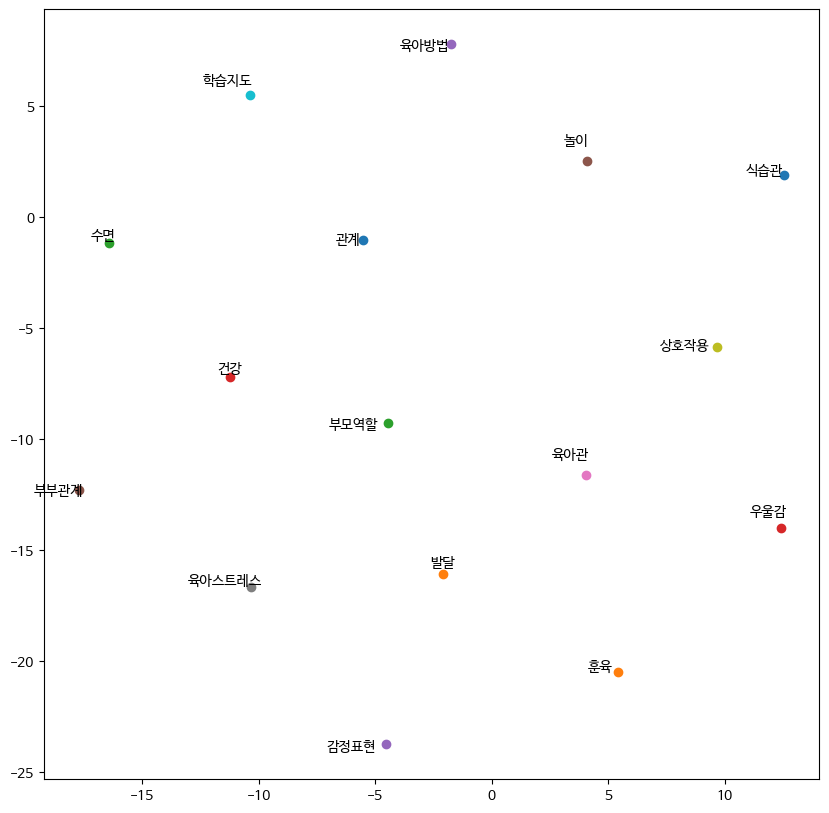

In [ ]:
plt.figure(figsize=(10, 10))

# 무작위 오프셋을 위한 범위 설정
offset_range = 10  # 오프셋 범위를 조정할 수 있습니다.

for i, word in enumerate(word_index.keys()):
    if i >= 1000:  # 처음 1000개 단어만 표시
        break
    x, y = tsne_results[i, 0], tsne_results[i, 1]
    # 무작위 오프셋 추가
    x_offset = np.random.uniform(-offset_range, offset_range)
    y_offset = np.random.uniform(-offset_range, offset_range)

    plt.scatter(x, y)
    plt.annotate(word, xy=(x, y), xytext=(x_offset, y_offset),
                 textcoords='offset points', ha='right', va='bottom')

plt.show()

# PCA 시각화

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# PCA 인스턴스 생성 및 학습
pca = PCA(n_components=2)
pca_results = pca.fit_transform(weights)

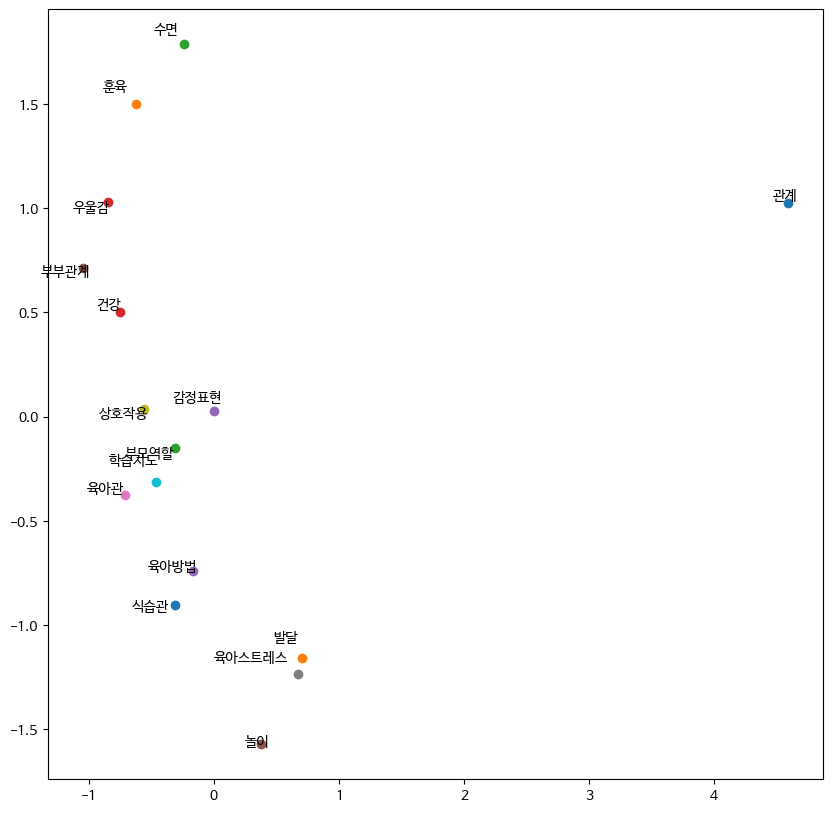

In [ ]:
import numpy as np

# 시각화
plt.figure(figsize=(10,10))

# 무작위 오프셋을 위한 범위 설정
offset_range = 10  # 오프셋 범위를 조정할 수 있습니다.

for i, word in enumerate(word_index.keys()):
    if i >= 1000:  # 처음 1000개 단어만 표시
        break
    x, y = pca_results[i, 0], pca_results[i, 1]
    # 무작위 오프셋 추가
    x_offset = np.random.uniform(-offset_range, offset_range)
    y_offset = np.random.uniform(-offset_range, offset_range)

    plt.scatter(x, y)
    plt.annotate(word, xy=(x, y), xytext=(x_offset, y_offset),
                 textcoords='offset points', ha='right', va='bottom')

plt.show()
